<a href="https://colab.research.google.com/github/minsuzzz/kaggle_study/blob/main/kaggle_study_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
file_uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# GCS_DS_PATH = "gs://kds-181a4deafa270c5ce4ace71ede22337472ee9dfc903a7326ed8770cb"
data = pd.read_csv('train.csv')

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.isnull().sum() #총 null 값을 체크한다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**과 **Cabin**, **Embarked**에 null 값이 있음

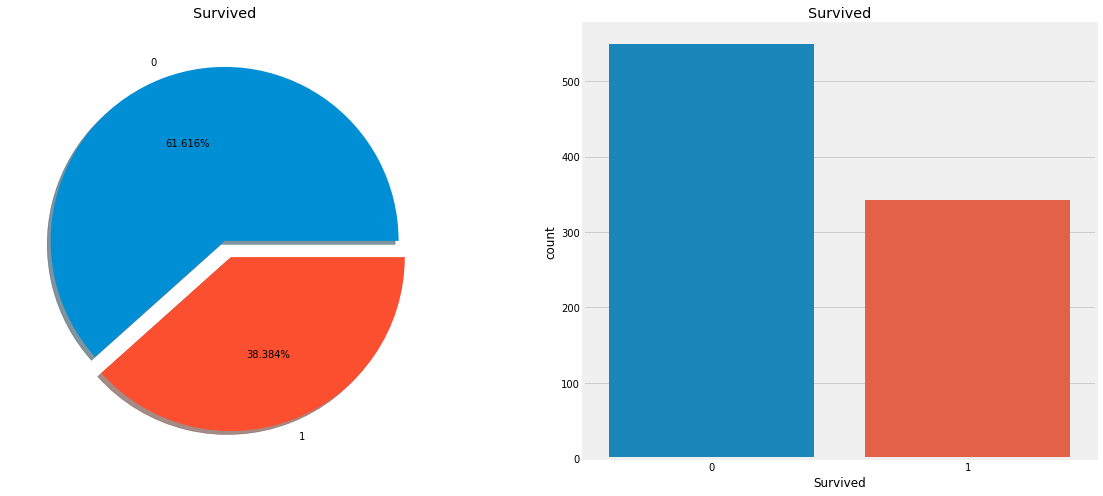

In [41]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #subplots(1:세로 그림개수, 2:가로 그림개수, figsize=가로,세로)
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) # plot.pie(explode=[0, 0.1: 각 부분의 간격 넓이], autopct: 소수점 1자리까지 표현,  ax=ax[0]: 가로 2개 중 첫번째 index 위치에 넣는다.
ax[0].set_title('Survived') # plot 제목을 적기
ax[0].set_ylabel('') # 왼쪽 y라벨을 공백으로 넣는다. (지운다) 기본적으로 데이터명이 들어가있음

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

사고에서 살아남은 승객은 많지 않습니다.

train 셋에 있는 891명의 승객 중 약 350명만 생존했습니다. 즉, 전체 데이터의 38.4%만이 충돌에서 생존했습니다. 

데이터에서 더 나은 통찰력을 얻고 생존한 승객범주와 생존하지 못한 승객 범주를 확인하려면 더 자세히 조사해야 합니다

데이터 세트의 다양한 기능을 사용하여 생존율을 확인하려고 합니다. 일

부 기능은 성별, 출항항, 연령 등입니다. 먼저 다양한 유형의 기능을 이해하겠습니다.




In [46]:
data.groupby(['Sex', 'Survived'])['Survived'].count() # 그룹지어서 필터한다. 강력!

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

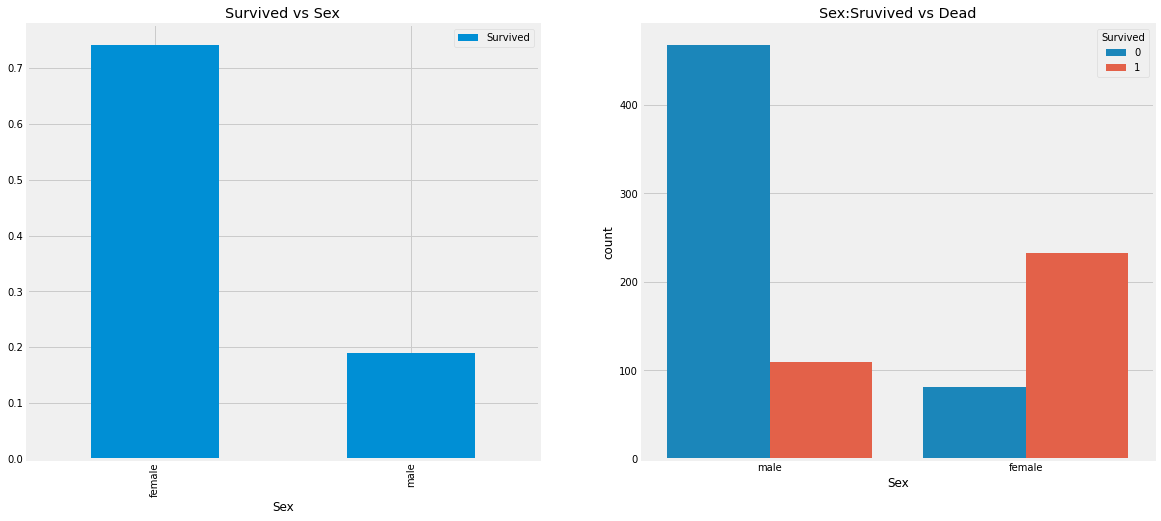

In [56]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Sruvived vs Dead')
plt.show()


In [57]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r') #pd.crosstab(세로값, 가로값)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


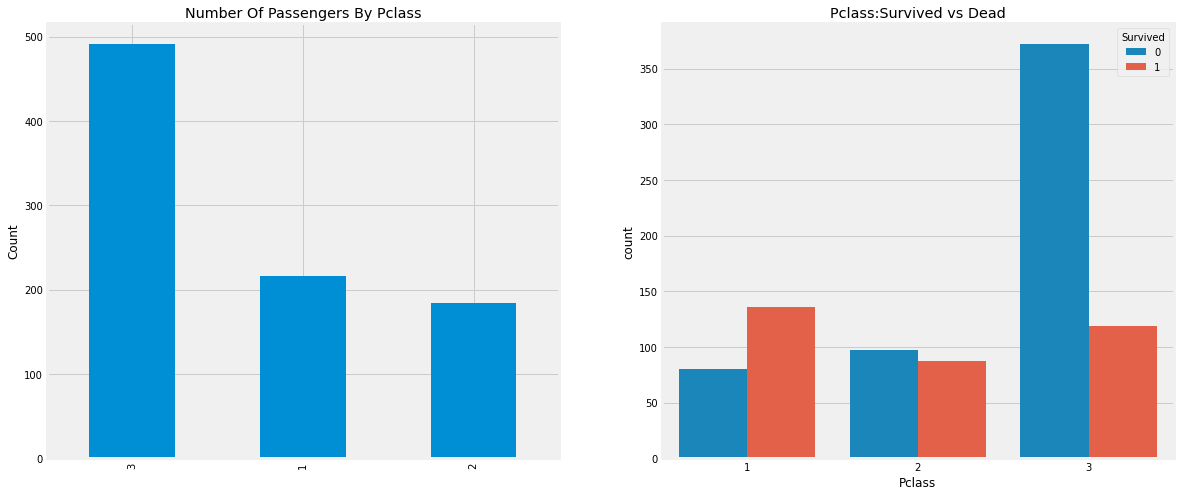

In [62]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [66]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

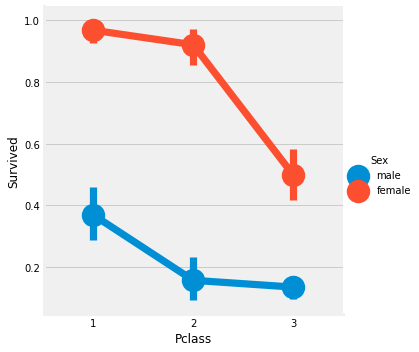

In [67]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data) #hue: 비교할것 
# factor plot은 범주형 값을 쉽게 분리할 수 있다.
plt.show()

In [71]:
print('Olderst Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Olderst Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


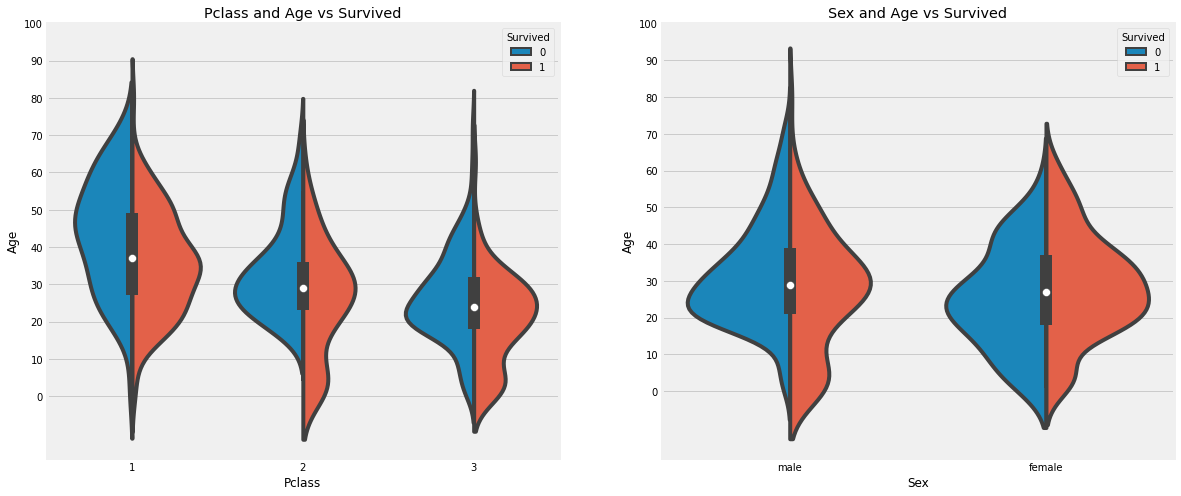

In [79]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0]) #split은 비교하는 두개를하나로 묶는다는 것.
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [81]:
data['Initial'] = 0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # A-Z와 a-z까지 중 점(.)이 오는 문자열을 찾기 >>> Mrs. Mr 등을 추출하자. 

In [82]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') #성별로 이니셜 확인하기

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [83]:
data.groupby('Initial')['Age'].mean() #이니셜로 평균나이를 파악해본다

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64